# MEFISTO application to longitudinal microbiome data

This notebook demonstrates how longitudinal data can be analysed with MEFISTO.

The following files are used in this tutorial:
microbiome_data.csv containing the microbiome data used as input,
microbiome_features_metadata.csv containing taxonomic information for the features in the model,
microbiome_model.hdf5 containing the pre-trained MEFISTO model.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from mofapy2.run.entry_point import entry_point
import mofax

# initialise the entry point
ent = entry_point()


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        


# Load data

We first load the dataframe that contains the preprocessed microbiome data for all children (groups) as well as the time annotation (month of life) for each sample.

In [2]:
datadir = "./"

In [3]:
microbiome = pd.read_csv(f"{datadir}/microbiome_data.csv")
microbiome.head()

,group,month,feature,value,view,sample,delivery,diet,sex
0,C001,0,ac5402de1ddf427ab8d2b0a8a0a44f19,0.616022,microbiome,C001_0,Vaginal,bd,Female
1,C001,0,2a2947125c677c6e27898ad4e9b9dca7,NaN,microbiome,C001_0,Vaginal,bd,Female
2,C001,0,0cc2420a6a4698f8bf664d50b17d26b4,NaN,microbiome,C001_0,Vaginal,bd,Female
3,C001,0,651794369aeb3db83839b81fe49c8b4e,NaN,microbiome,C001_0,Vaginal,bd,Female
4,C001,0,e6a34eb113dba66df0b8bbec907a8f5d,-0.416379,microbiome,C001_0,Vaginal,bd,Female


In [4]:
feature_meta = pd.read_csv(f"{datadir}/microbiome_features_metadata.csv")
feature_meta.head()

,SampleID,Taxon,Confidence
0,ac5402de1ddf427ab8d2b0a8a0a44f19,k__Bacteria; p__Bacteroidetes; c__Bacteroidia;...,0.999770
1,2a2947125c677c6e27898ad4e9b9dca7,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,1.000000
2,0cc2420a6a4698f8bf664d50b17d26b4,k__Bacteria; p__Bacteroidetes; c__Bacteroidia;...,0.968037
3,3d9838f12f6ff5591dbadeb427a855f1,k__Bacteria; p__Bacteroidetes; c__Bacteroidia;...,0.859635
4,651794369aeb3db83839b81fe49c8b4e,k__Bacteria; p__Bacteroidetes; c__Bacteroidia;...,0.995550


# Prepare and train MEFISTO

Create the MOFA object

First, we need to create a MOFA object from this data. This step is analogous to use of MOFA without the time information and can be done using create_mofa, which results in an untrained MOFA object.

In [5]:
ent = entry_point()
ent.set_data_options(center_groups=False)
ent.set_data_df(microbiome)


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        


Loaded group='C001' view='microbiome' with N=24 samples and D=969 features...
Loaded group='C002' view='microbiome' with N=24 samples and D=969 features...
Loaded group='C004' view='microbiome' with N=24 samples and D=969 features...
Loaded group='C005' view='microbiome' with N=24 samples and D=969 features...
Loaded group='C007' view='microbiome' with N=24 samples and D=969 f

In [7]:
microbiome_groups = [microbiome.loc[microbiome.group == group,["sample", "group", "month"]].drop_duplicates().set_index("sample") for group in ent.data_opts["groups_names"]]
ent.data_opts["samples_metadata"] = microbiome_groups

Next, we want to add the time information for each sample, which we can do using set_covariates. As the information on the month for each sample is already contained in the data that we passed to the entry_point above, we can just specify to use this column as a covariate. Alternatively, we could also supply a new matrix or data frame providing the sample names and covariates.

In [8]:
ent.set_covariates("month", covariates_names="month")

Loaded 1 covariate(s) for each sample...




We now need to provide model and train options:

In [9]:
ent.set_model_options(factors=2)
ent.set_train_options(seed=2020)
ent.set_smooth_options(n_grid=10, start_opt=50, opt_freq=50)


Model options:
- Automatic Relevance Determination prior on the factors: False
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weights: True
Likelihoods:
- View 0 (microbiome): gaussian




Now we are ready to use MEFISTO with this object and save the results in a specified location. As this can take some time, we provide a pre-trained model below.

In [10]:
ent.build()
ent.run()
## To get interpolated factor values
#ent.predict_factor(microbiome.month.unique().reshape(-1, 1))
#ent.save(f"microbiome_model.hdf5")



######################################
## Training the model with seed 2020 ##
######################################


ELBO before training: -358142.68 

Iteration 1: time=0.26, ELBO=-125601.16, deltaELBO=232541.518 (64.92985458%), Factors=2
Iteration 2: time=0.21, ELBO=-123251.18, deltaELBO=2349.977 (0.65615661%), Factors=2
Iteration 3: time=0.22, ELBO=-122595.75, deltaELBO=655.427 (0.18300730%), Factors=2
Iteration 4: time=0.21, ELBO=-122169.49, deltaELBO=426.258 (0.11901904%), Factors=2
Iteration 5: time=0.21, ELBO=-121858.52, deltaELBO=310.977 (0.08683041%), Factors=2
Iteration 6: time=0.22, ELBO=-121635.96, deltaELBO=222.559 (0.06214254%), Factors=2
Iteration 7: time=0.22, ELBO=-121480.29, deltaELBO=155.665 (0.04346440%), Factors=2
Iteration 8: time=0.23, ELBO=-121372.74, deltaELBO=107.559 (0.03003231%), Factors=2
Iteration 9: time=0.23, ELBO=-121297.62, deltaELBO=75.113 (0.02097294%), Factors=2
Iteration 10: time=0.28, ELBO=-121242.47, deltaELBO=55.153 (0.01539961%), Factors=2

# Downstream analysis

For downstream analysis we can either use R (package MOFA2) or the Python package mofax. Here we will proceed in Python and first load the pre-trained model generated by the above steps.

In [26]:
m = mofax.mofa_model(f"{datadir}/microbiome_model.hdf5")
m

MOFA+ model: microbiome model
Samples (cells): 1032
Features: 969
Groups: C001 (24), C002 (24), C004 (24), C005 (24), C007 (24), C008 (24), C009 (24), C010 (24), C011 (24), C012 (24), C014 (24), C016 (24), C017 (24), C018 (24), C020 (24), C021 (24), C022 (24), C023 (24), C024 (24), C025 (24), C027 (24), C030 (24), C031 (24), C032 (24), C033 (24), C034 (24), C035 (24), C036 (24), C037 (24), C038 (24), C041 (24), C042 (24), C043 (24), C044 (24), C045 (24), C046 (24), C047 (24), C049 (24), C052 (24), C053 (24), C055 (24), C056 (24), C057 (24)
Views: microbiome (969)
Factors: 2
Expectations: Sigma, W, Z

MEFISTO:
Covariates available: month
Interpolated factors for 24 new values

In the case of using the pre-trained model with missing metadata, we might need to add it:

In [27]:
m.samples_metadata = (m.covariates.set_index(["group", "month"], 
                                             append=True).merge(
    microbiome.loc[:,["sample", "group", "month", "delivery", "diet", "sex"]].drop_duplicates(), 
    on=["sample", "group", "month"],
    sort=False)
).set_index("sample")
m.samples_metadata.head()

,group,month,month_transformed,delivery,diet,sex
sample,,,,,,
C001_0,C001,0.0,0.0,Vaginal,bd,Female
C001_1,C001,1.0,1.0,Vaginal,bd,Female
C001_2,C001,2.0,2.0,Vaginal,bd,Female
C001_3,C001,3.0,3.0,Vaginal,bd,Female
C001_4,C001,4.0,4.0,Vaginal,bd,Female


In [28]:
feature_meta[["kingdom", "phylum", "class", "order", "family", "genus", "species"]] = feature_meta.Taxon.str.split("; ", expand=True)

In [29]:
m.features_metadata = (
    m.features_metadata.merge(
        feature_meta
            .rename(columns={"SampleID": "feature"}), 
        on="feature", sort=False).set_index("feature")
)
m.features_metadata.head()

,view,Taxon,Confidence,kingdom,phylum,class,order,family,genus,species
feature,,,,,,,,,,
ac5402de1ddf427ab8d2b0a8a0a44f19,microbiome,k__Bacteria; p__Bacteroidetes; c__Bacteroidia;...,0.999770,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Bacteroides,s__
2a2947125c677c6e27898ad4e9b9dca7,microbiome,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,1.000000,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__[Tissierellaceae],g__WAL_1855D,s__
0cc2420a6a4698f8bf664d50b17d26b4,microbiome,k__Bacteria; p__Bacteroidetes; c__Bacteroidia;...,0.968037,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Rikenellaceae,g__Alistipes,s__onderdonkii
651794369aeb3db83839b81fe49c8b4e,microbiome,k__Bacteria; p__Bacteroidetes; c__Bacteroidia;...,0.995550,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Prevotellaceae,g__Prevotella,s__
e6a34eb113dba66df0b8bbec907a8f5d,microbiome,k__Bacteria; p__Bacteroidetes; c__Bacteroidia;...,0.974159,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Rikenellaceae,g__Alistipes,s__putredinis


# Factor overview and visualization

# Variance decomposition and factor correlation

To obtain a first overview of the factors we can take a look at the variance that a factor explains in each child.

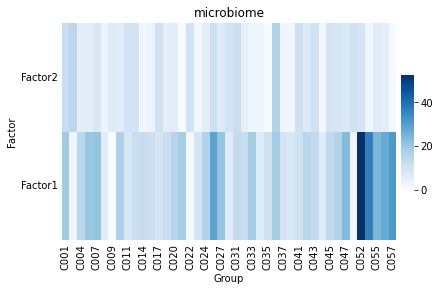

In [30]:
mofax.plot_r2(m, cmap="Blues")

In [ ]:
Factors versus month of life

To investigate the inferred factors, we can plot them against the months of life and colour them by the metadata of the samples. Here, we color by delivery mode and diet.

Using the first two factors, we can project the samples into a 2-dimensional space.

In [1]:
cols4diet = {"fd": "#1f78b4", "bd": "#b2df8a"}
cols4delivery = {"Cesarean": "#e6ab02", "Vaginal": "#d95f02"}

In [2]:
mofax.plot_factors(m, x="month", y=[0, 1], 
                   color="delivery", palette=cols4delivery, alpha=.7)

NameError: name 'mofax' is not defined

ValueError: Could not generate a palette for <map object at 0x144495880>

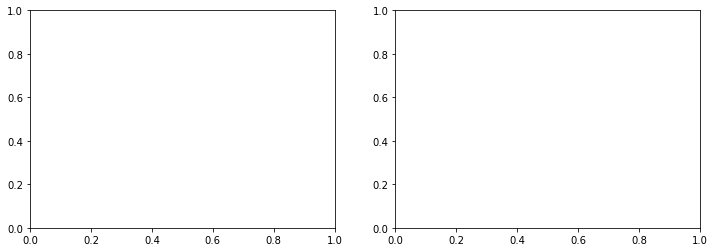

In [33]:
mofax.plot_factors(m, x="month", y=[0, 1], 
                   color="diet", palette=cols4diet, alpha=.7)

# Interpolation

Using the underlying Gaussian process for each factor we can interpolate to unseen time points for children that are missing data in these time points and intermediate time points.

We will plot values for the first 5 children:

In [35]:
#Using the first two factors, we can project the samples into a 2-dimensional space.
mofax.plot_factors_scatter(m, x=0, y=1, color=["group", "time", "time_transformed"])

AssertionError: Requested features are not found

<AxesSubplot:title={'center':'Factor2'}, xlabel='month_transformed', ylabel='Factor2'>

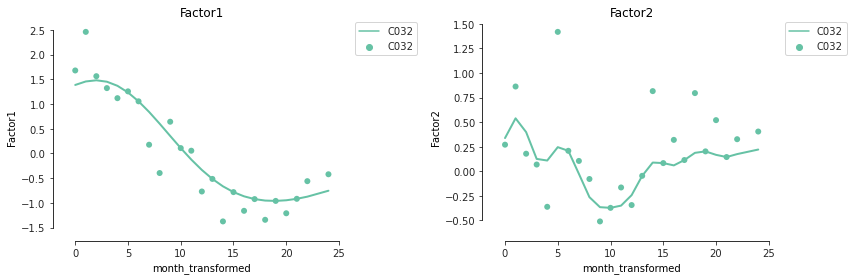

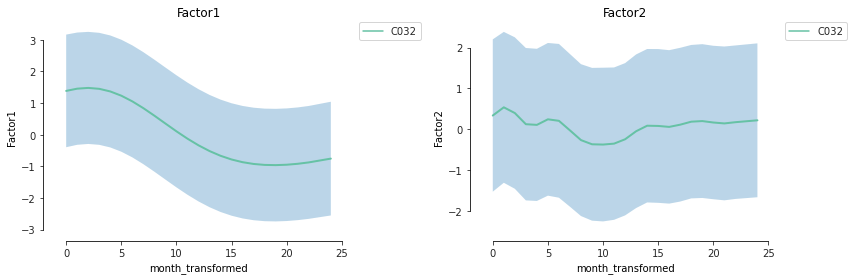

In [36]:
mofax.plot_interpolated_factors(m, groups=["C032"], size=70, only_mean=True)

mofax.plot_interpolated_factors(m, groups=["C032"], size=70, show_observed=False)

# Scatterplot

We can also look at the factor values on the sample level. Here each dot correspond to one time-point-child combination.

ValueError: Could not generate a palette for <map object at 0x1446ff2b0>

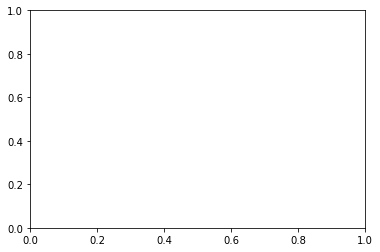

In [37]:
mofax.plot_factors(m, color="delivery", palette=cols4delivery, alpha=.7)
mofax.plot_factors(m, color="diet", palette=cols4diet, alpha=.7)
mofax.plot_factors(m, color="month", )